# Logistic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
X = iris.data[:, :2]
y = (iris.target != 0) * 1

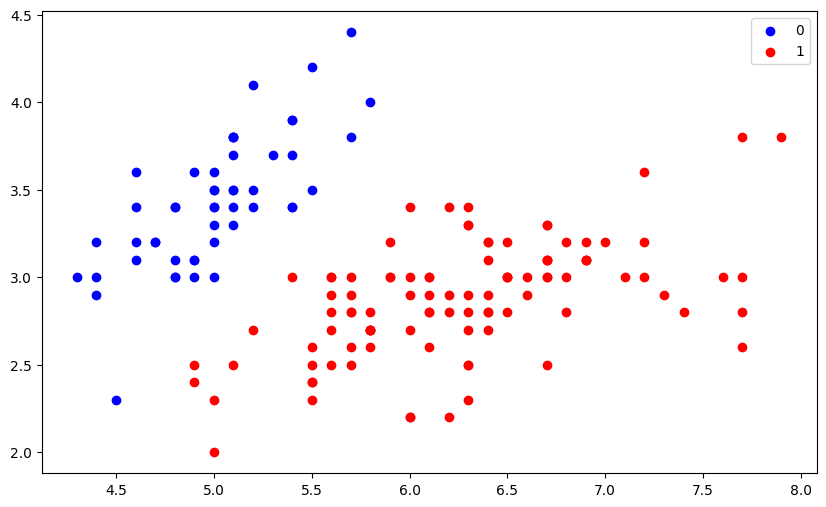

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [5]:
class LogisticRegression:
    
    # defining parameters such as learning rate, number ot iterations, whether to include intercept, 
    # and verbose which says whether to print anything or not like, loss etc.
    def __init__(self, learning_rate=0.01, num_iterations=50000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    # function to define the Incercept value.
    def __b_intercept(self, X):
        # initially we set it as all 1's
        intercept = np.ones((X.shape[0], 1))
        # then we concatinate them to the value of X, we don't add we just append them at the end.
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid_function(self, z):
        # this is our actual sigmoid function which predicts our yp
        return 1 / (1 + np.exp(-z))
    
    def __loss(self, yp, y):
        # this is the loss function which we use to minimize the error of our model
        return (-y * np.log(yp) - (1 - y) * np.log(1 - yp)).mean()
    
    # this is the function which trains our model.
    def fit(self, X, y):
        
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # weights initialization of our Normal Vector, initially we set it to 0, then we learn it eventually
        self.W = np.zeros(X.shape[1])
        
        # this for loop runs for the number of iterations provided
        for i in range(self.num_iterations):
            
            # this is our W * Xi
            z = np.dot(X, self.W)
            
            # this is where we predict the values of Y based on W and Xi
            yp = self.__sigmoid_function(z)
            
            # this is where the gradient is calculated form the error generated by our model
            gradient = np.dot(X.T, (yp - y)) / y.size
            
            # this is where we update our values of W, so that we can use the new values for the next iteration
            self.W -= self.learning_rate * gradient
            
            # this is our new W * Xi
            z = np.dot(X, self.W)
            yp = self.__sigmoid_function(z)
            
            # this is where the loss is calculated
            loss = self.__loss(yp, y)
            
            # as mentioned above if we want to print somehting we use verbose, so if verbose=True then our loss get printed
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    # this is where we predict the probability values based on out generated W values out of all those iterations.
    def predict_prob(self, X):
        # as said if we want our intercept term to be added we use fit_intercept=True
        if self.fit_intercept:
            X = self.__b_intercept(X)
        
        # this is the final prediction that is generated based on the values learned.
        return self.__sigmoid_function(np.dot(X, self.W))
    
    # this is where we predict the actual values 0 or 1 using round. anything less than 0.5 = 0 or more than 0.5 is 1
    def predict(self, X):
        return self.predict_prob(X).round()

In [6]:
model = LogisticRegression(learning_rate=0.1, num_iterations=300000)

In [7]:

%%time
model.fit(X, y)

CPU times: total: 25.1 s
Wall time: 28.4 s


In [8]:
preds = model.predict(X)
(preds == y).mean()

np.float64(1.0)

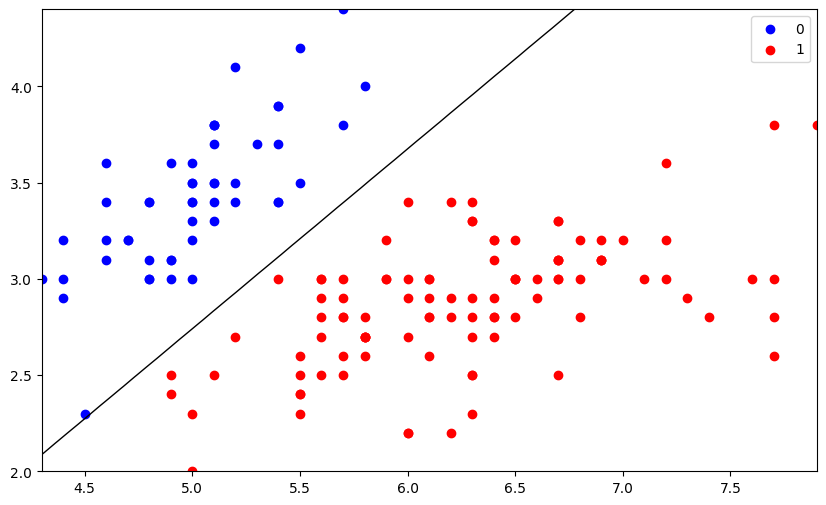

In [9]:

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

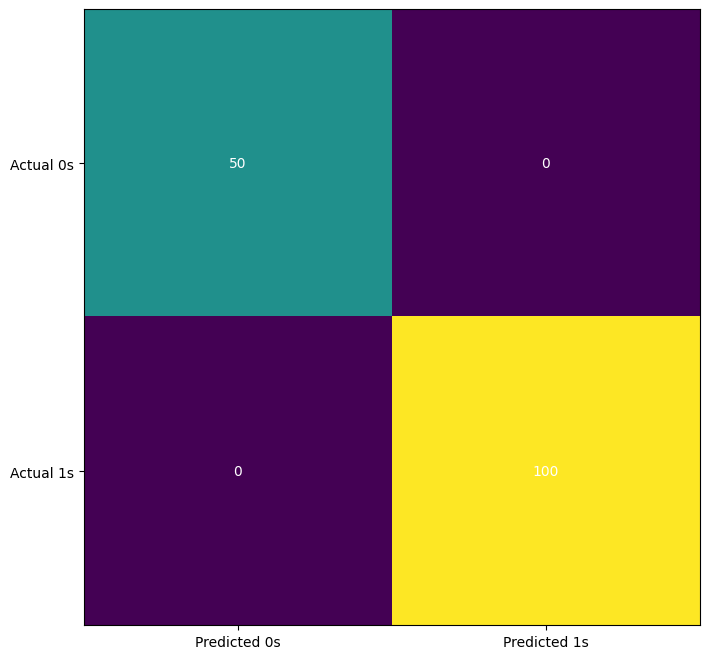

In [10]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

## IMplementation using Logistic Regression

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear', random_state=0)

In [12]:
model.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [13]:
# predict and check the values of its prediction
model.predict_proba(X)

array([[8.90851839e-01, 1.09148161e-01],
       [6.45187510e-01, 3.54812490e-01],
       [8.69400222e-01, 1.30599778e-01],
       [8.51288377e-01, 1.48711623e-01],
       [9.39818917e-01, 6.01810828e-02],
       [9.50364297e-01, 4.96357033e-02],
       [9.49998814e-01, 5.00011855e-02],
       [8.75288203e-01, 1.24711797e-01],
       [8.08902352e-01, 1.91097648e-01],
       [7.30634124e-01, 2.69365876e-01],
       [8.95888506e-01, 1.04111494e-01],
       [9.20303724e-01, 7.96962761e-02],
       [6.99920244e-01, 3.00079756e-01],
       [8.90098824e-01, 1.09901176e-01],
       [9.13422567e-01, 8.65774329e-02],
       [9.85294062e-01, 1.47059381e-02],
       [9.50364297e-01, 4.96357033e-02],
       [8.90851839e-01, 1.09148161e-01],
       [8.58798284e-01, 1.41201716e-01],
       [9.64399433e-01, 3.56005674e-02],
       [7.21654128e-01, 2.78345872e-01],
       [9.47809512e-01, 5.21904883e-02],
       [9.76891959e-01, 2.31080409e-02],
       [7.85782889e-01, 2.14217111e-01],
       [9.203037

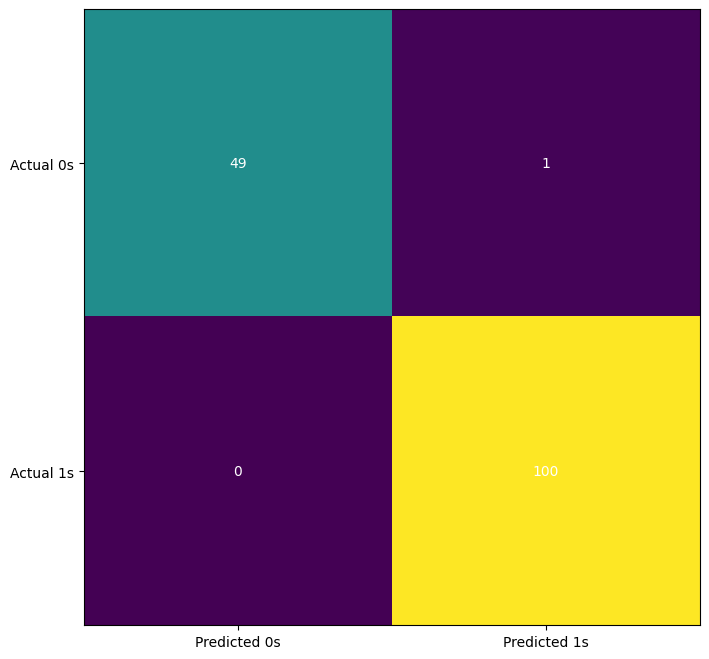

In [14]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [15]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.99      1.00      1.00       100

    accuracy                           0.99       150
   macro avg       1.00      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

